# 9 day analysis

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

Welcome to JupyROOT 6.12/04


In [2]:
blinds = np.loadtxt('blinds.txt')

def apply_blinds_fp(input_df, blinds):
    output_df = input_df.copy()
    for m in range(6):
        stms = ['st'+str(st)+',m'+str(m+1) for st in range(72)]
        output_df[stms] = output_df[stms] + blinds[m]
    return output_df

def apply_blinds_tr(input_df, blinds):
    output_df = input_df.copy()
    for m in range(6):
        stms = ['st'+str(st)+',m'+str(m+1) for st in range(72)]
        output_df[stms] = output_df[stms] + blinds[m]
        trms = ['tr,m'+str(m+1)]
        output_df[trms] = output_df[trms] + blinds[m]
    return output_df

### Memory Effecient Read-In

Not good for debugging, doesn't store interpolation data frames.

In [3]:
%%time

print 'fp run 1'
fp_moment_df_1 = apply_blinds_fp(helper.calc_moment_df(pd.read_hdf('old_hdf5/9day_fp_interp.h5', 'df_1')), blinds)
print 'fp run 2'
fp_moment_df_2 = apply_blinds_fp(helper.calc_moment_df(pd.read_hdf('old_hdf5/9day_fp_interp.h5', 'df_2')), blinds)
print 'fp run 3'
fp_moment_df_3 = apply_blinds_fp(helper.calc_moment_df(pd.read_hdf('old_hdf5/9day_fp_interp.h5', 'df_3')), blinds)
print 'fp run 4'
fp_moment_df_4 = apply_blinds_fp(helper.calc_moment_df(pd.read_hdf('old_hdf5/9day_fp_interp.h5', 'df_4')), blinds)

print 'tr run 1'
tr_moment_df_1 = apply_blinds_tr(helper.calc_moment_df(pd.read_hdf('old_hdf5/9day_tr_interp.h5', 'df_1')), blinds)
print 'tr run 2'
tr_moment_df_2 = apply_blinds_tr(helper.calc_moment_df(pd.read_hdf('old_hdf5/9day_tr_interp.h5', 'df_2')), blinds)
print 'tr run 3'
tr_moment_df_3 = apply_blinds_tr(helper.calc_moment_df(pd.read_hdf('old_hdf5/9day_tr_interp.h5', 'df_3')), blinds)
print 'tr run 4'
tr_moment_df_4 = apply_blinds_tr(helper.calc_moment_df(pd.read_hdf('old_hdf5/9day_tr_interp.h5', 'df_4')), blinds)
print 'tr run 5'
tr_moment_df_5 = apply_blinds_tr(helper.calc_moment_df(pd.read_hdf('old_hdf5/9day_tr_interp.h5', 'df_5')), blinds)
print 'tr run 6'
tr_moment_df_6 = apply_blinds_tr(helper.calc_moment_df(pd.read_hdf('old_hdf5/9day_tr_interp.h5', 'df_6')), blinds)

fp run 1
Finished calculating all moments for 259802 events. 
fp run 2
Finished calculating all moments for 201041 events.
fp run 3
Finished calculating all moments for 234333 events.   
fp run 4
Finished calculating all moments for 154063 events.
tr run 1
Finished calculating all moments for 4344 events.
tr run 2
Finished calculating all moments for 4357 events.
tr run 3
Finished calculating all moments for 4359 events.
tr run 4
Finished calculating all moments for 4360 events.
tr run 5
Finished calculating all moments for 4702 events.
tr run 6
Finished calculating all moments for 4356 events.
CPU times: user 1min 5s, sys: 2min 16s, total: 3min 21s
Wall time: 58.2 s


### Memory hog read in
Most recently files are in `/data1/newg2/DataProduction/Offline/ArtTFSDir/v9_20_00`.

In [4]:
# prefix = 'v9_20_00/FieldPlainRootOutput_'

# fp_interp_df_1 = helper.root_to_pandas(range(4141,4179), prefix=prefix, tr_run=False)
# fp_interp_df_2 = helper.root_to_pandas(range(4193,4223), prefix=prefix, tr_run=False)
# fp_interp_df_3 = helper.root_to_pandas(range(4229,4263), prefix=prefix, tr_run=False)
# fp_interp_df_4 = helper.root_to_pandas(range(4283,4489), prefix=prefix, tr_run=False)

# tr_interp_df_1 = helper.root_to_pandas([4138], prefix=prefix, tr_run=True)
# tr_interp_df_2 = helper.root_to_pandas([4181], prefix=prefix, tr_run=True)
# tr_interp_df_3 = helper.root_to_pandas([4189], prefix=prefix, tr_run=True)
# tr_interp_df_4 = helper.root_to_pandas([4226], prefix=prefix, tr_run=True)
# tr_interp_df_5 = helper.root_to_pandas([4265], prefix=prefix, tr_run=True)
# tr_interp_df_6 = helper.root_to_pandas([4493], prefix=prefix, tr_run=True)

# fp_interp_df_1.to_hdf('9day_fp_interp.h5', 'df_1')
# fp_interp_df_2.to_hdf('9day_fp_interp.h5', 'df_2')
# fp_interp_df_3.to_hdf('9day_fp_interp.h5', 'df_3')
# fp_interp_df_4.to_hdf('9day_fp_interp.h5', 'df_4')

# tr_interp_df_1.to_hdf('9day_tr_interp.h5', 'df_1')
# tr_interp_df_2.to_hdf('9day_tr_interp.h5', 'df_2')
# tr_interp_df_3.to_hdf('9day_tr_interp.h5', 'df_3')
# tr_interp_df_4.to_hdf('9day_tr_interp.h5', 'df_4')
# tr_interp_df_5.to_hdf('9day_tr_interp.h5', 'df_5')
# tr_interp_df_6.to_hdf('9day_tr_interp.h5', 'df_6')

fp_interp_df_1 = pd.read_hdf('9day_fp_interp.h5', 'df_1')
fp_interp_df_2 = pd.read_hdf('9day_fp_interp.h5', 'df_2')
fp_interp_df_3 = pd.read_hdf('9day_fp_interp.h5', 'df_3')
fp_interp_df_4 = pd.read_hdf('9day_fp_interp.h5', 'df_4')

tr_interp_df_1 = pd.read_hdf('9day_tr_interp.h5', 'df_1')
tr_interp_df_2 = pd.read_hdf('9day_tr_interp.h5', 'df_2')
tr_interp_df_3 = pd.read_hdf('9day_tr_interp.h5', 'df_3')
tr_interp_df_4 = pd.read_hdf('9day_tr_interp.h5', 'df_4')
tr_interp_df_5 = pd.read_hdf('9day_tr_interp.h5', 'df_5')
tr_interp_df_6 = pd.read_hdf('9day_tr_interp.h5', 'df_6')

IOError: File 9day_fp_interp.h5 does not exist

In [ ]:
fp_moment_df_1 = apply_blinds_fp(helper.calc_moment_df(fp_interp_df_1), blinds)
fp_moment_df_2 = apply_blinds_fp(helper.calc_moment_df(fp_interp_df_2), blinds)
fp_moment_df_3 = apply_blinds_fp(helper.calc_moment_df(fp_interp_df_3), blinds)
fp_moment_df_4 = apply_blinds_fp(helper.calc_moment_df(fp_interp_df_4), blinds)

tr_moment_df_1 = apply_blinds_tr(helper.calc_moment_df(tr_interp_df_1), blinds)
tr_moment_df_2 = apply_blinds_tr(helper.calc_moment_df(tr_interp_df_2), blinds)
tr_moment_df_3 = apply_blinds_tr(helper.calc_moment_df(tr_interp_df_3), blinds)
tr_moment_df_4 = apply_blinds_tr(helper.calc_moment_df(tr_interp_df_4), blinds)
tr_moment_df_5 = apply_blinds_tr(helper.calc_moment_df(tr_interp_df_5), blinds)
tr_moment_df_6 = apply_blinds_tr(helper.calc_moment_df(tr_interp_df_6), blinds)

## Remove trolley footprint and do station averaging

In [5]:
%%time

# tr_corr_df_1 = trfp.analysis.remove_trolley_effect(tr_moment_df_1)
# tr_corr_df_2 = trfp.analysis.remove_trolley_effect(tr_moment_df_2)
# tr_corr_df_3 = trfp.analysis.remove_trolley_effect(tr_moment_df_3)
# tr_corr_df_4 = trfp.analysis.remove_trolley_effect(tr_moment_df_4)
# tr_corr_df_5 = trfp.analysis.remove_trolley_effect(tr_moment_df_5)
# tr_corr_df_6 = trfp.analysis.remove_trolley_effect(tr_moment_df_6)

tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)
tr_corr_df_3 = helper_old.trolley_footprint_replacement(tr_moment_df_3)
tr_corr_df_4 = helper_old.trolley_footprint_replacement(tr_moment_df_4)
tr_corr_df_5 = helper_old.trolley_footprint_replacement(tr_moment_df_5)
tr_corr_df_6 = helper_old.trolley_footprint_replacement(tr_moment_df_6)

Removing trolley image from station 71.                                                                                  CPU times: user 22.8 s, sys: 13.6 s, total: 36.4 s
Wall time: 18.1 s



In [6]:
%%time

tr_baseline_1, fp_baseline_1, baseline_time_1, summed_azimuth_1, summed_pts_1 = helper_old.trolley_run_station_average(tr_corr_df_1)
tr_baseline_2, fp_baseline_2, baseline_time_2, summed_azimuth_2, summed_pts_2 = helper_old.trolley_run_station_average(tr_corr_df_2)
tr_baseline_3, fp_baseline_3, baseline_time_3, summed_azimuth_3, summed_pts_3 = helper_old.trolley_run_station_average(tr_corr_df_3)
tr_baseline_4, fp_baseline_4, baseline_time_4, summed_azimuth_4, summed_pts_4 = helper_old.trolley_run_station_average(tr_corr_df_4)
tr_baseline_5, fp_baseline_5, baseline_time_5, summed_azimuth_5, summed_pts_5 = helper_old.trolley_run_station_average(tr_corr_df_5)
tr_baseline_6, fp_baseline_6, baseline_time_6, summed_azimuth_6, summed_pts_6 = helper_old.trolley_run_station_average(tr_corr_df_6)

CPU times: user 1.12 s, sys: 241 ms, total: 1.36 s
Wall time: 1.34 s


In [ ]:
sync_offsets, delta_t = helper.sync_offset_calc(tr_corr_df_5, tr_corr_df_6)

def gaussian(x, A, x0, sigma): return A*np.exp(-(x-x0)**2/2./sigma**2)

fig, axs = plt.subplots(2,3)
for i in range(2):
    for j in range(3):
        st = 3*i+j
        if st == 5: continue
            
        plt.sca(axs[i,j])
        hist, bins, _ = plt.hist(sync_offsets[:,st], bins=50)
        low, high = axs[i,j].get_xlim()
                
        bins = bins[0:-1] + 0.5*(bins[1]-bins[0])
        coeffs, _ = curve_fit(gaussian, bins, hist, p0=[1., 0., 10.])
        fit = gaussian(np.arange(low, high, 0.1), coeffs[0], coeffs[1], coeffs[2])
        plt.plot(np.arange(low,high,0.1), fit, label=r'$\omega_0$ = '+str(np.round(coeffs[1],1))+'\n$\sigma$ = '+str(np.round(coeffs[2],1)))
        plt.legend(loc=1)
        plt2.plt_set_labels(axs[i,j], 'sync offset (Hz)', '', 'm '+str(st+1))
        
        if st == 0: plt.xlim(-100,100)
        else: plt.xlim(-50,50)


fig.set_size_inches(12,8)
fig.tight_layout()

In [ ]:
print np.mean(sync_offsets_1[:,0])/61.79
print np.std(sync_offsets_1[:,0])/61.79
print np.std(sync_offsets_1[:,0])/61.79/np.sqrt(72)

plt.hist(sync_offsets_1[:,0]/61.7, bins=50)

In [ ]:
print np.mean(sync_offsets_1[:,0])/61.79
print np.std(sync_offsets_1[:,0])/61.79
print np.std(sync_offsets_1[:,0])/61.79/np.sqrt(72)

plt.hist(sync_offsets_1[:,0]/61.7, bins=50)

In [7]:
%%time

vtm_df_1 = helper.vtm_calc(fp_moment_df_1,
                           baseline_time_1, baseline_time_2,
                           tr_baseline_1, tr_baseline_2,
                           fp_baseline_1, fp_baseline_2)

vtm_df_2 = helper.vtm_calc(fp_moment_df_2,
                           baseline_time_3, baseline_time_4,
                           tr_baseline_3, tr_baseline_4,
                           fp_baseline_3, fp_baseline_4)

vtm_df_3 = helper.vtm_calc(fp_moment_df_3,
                           baseline_time_4, baseline_time_5,
                           tr_baseline_4, tr_baseline_5,
                           fp_baseline_4, fp_baseline_5)

vtm_df_4 = helper.vtm_calc(fp_moment_df_4,
                           baseline_time_5, baseline_time_6,
                           tr_baseline_5, tr_baseline_6,
                           fp_baseline_5, fp_baseline_6)

CPU times: user 23.9 s, sys: 50.4 s, total: 1min 14s
Wall time: 14 s


In [8]:
%%time

bins_1 = np.arange(1525281500, 1525540500+20, 10)-5  # bin edges
bin_centers_1 = np.arange(1525281500, 1525540500+10, 10)
bins_2 = np.arange(1525586000, 1525786000+20, 10)-5  # bin edges
bin_centers_2 = np.arange(1525586000, 1525786000+10, 10)
bins_3 = np.arange(1525797000, 1526030000+20, 10)-5  # bin edges
bin_centers_3 = np.arange(1525797000, 1526030000+10, 10)
bins_4 = np.arange(1526074000, 1526227000+20, 10)-5  # bin edges
bin_centers_4 = np.arange(1526074000, 1526227000+10, 10)

vtm_bin_df_1 = vtm_df_1.groupby(pd.cut(vtm_df_1.index, bins_1)).mean()
vtm_bin_df_1.index = bin_centers_1
vtm_bin_df_2 = vtm_df_2.groupby(pd.cut(vtm_df_2.index, bins_2)).mean()
vtm_bin_df_2.index = bin_centers_2
vtm_bin_df_3 = vtm_df_3.groupby(pd.cut(vtm_df_3.index, bins_3)).mean()
vtm_bin_df_3.index = bin_centers_3
vtm_bin_df_4 = vtm_df_4.groupby(pd.cut(vtm_df_4.index, bins_4)).mean()
vtm_bin_df_4.index = bin_centers_4

vtm_bin_df_full = vtm_bin_df_1.copy()
vtm_bin_df_full = vtm_bin_df_full.append(vtm_bin_df_2)
vtm_bin_df_full = vtm_bin_df_full.append(vtm_bin_df_3)
vtm_bin_df_full = vtm_bin_df_full.append(vtm_bin_df_4)

CPU times: user 4.3 s, sys: 4.33 s, total: 8.63 s
Wall time: 8.58 s


In [9]:
%%time
azi_avg_df = pd.DataFrame(np.zeros((vtm_bin_df_full.shape[0],6)),
                         index = vtm_bin_df_full.index,
                         columns = ['m' + str(m) for m in np.arange(6)+1])

for m in range(5):
    weight = summed_azimuth_1[:, m] + summed_azimuth_2[:, m] + summed_azimuth_3[:, m]\
             + summed_azimuth_4[:, m] + summed_azimuth_5[:, m] + summed_azimuth_6[:, m]
    total_weight = np.nansum(weight)
    stm_list = ['st'+str(st)+',m'+str(m+1) for st in np.arange(72)]
    azi_avg_df['m'+str(m+1)] = vtm_bin_df_full[stm_list].multiply(weight).sum(axis=1)/total_weight
    
print_df = azi_avg_df[['m1','m2','m3','m5']].copy()/61.79
print_df['m1_err'] = -1
print_df['m2_err'] = -1
print_df['m3_err'] = -1
print_df['m5_err'] = -1

print_df = print_df.sort_index(axis='columns')
# print_df.head()
# print_df.to_csv('purcell_60hr_7-31.csv')

CPU times: user 258 ms, sys: 2.6 s, total: 2.86 s
Wall time: 844 ms


Text(0,0.5,'dipole (ppm)')

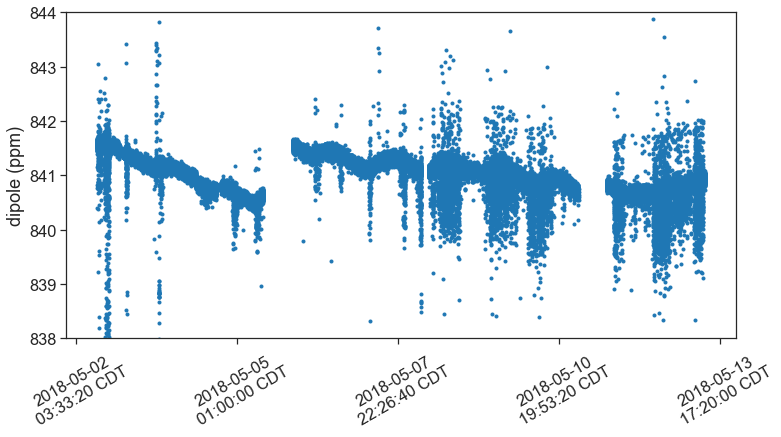

In [11]:
plt.plot(print_df.index.values, print_df['m1'], '.')
# plt.xlim((1525715000, 1525725000))
plt.ylim(838,844)
ax = plt.gca()
fig = plt.gcf()
plt2.plt_unix_time_to_CST(ax)

fig.set_size_inches(12,6)

ax.set_ylabel('dipole (ppm)')

In [ ]:
plt.plot(print_df.index.values, print_df['m1'], '.')